In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data lokasi gempa bumi indonesia
gempa = pd.read_csv("data_gempa_indonesia2.csv")
gempa.head()

,Year,Tsu,Location Name,Latitude,Longitude,Focal Depth (km),Mag
0,1674,Terjadi Tsunami,"INDONESIA: AMBON ISLAND, SERAM ISLAND",-3.75,127.75,40,6.8
1,1815,Terjadi Tsunami,INDONESIA: BALI,-8.00,115.00,150,7.0
2,1818,Terjadi Tsunami,INDONESIA: SUMBAWA ISLAND: BIMA,-7.00,117.00,600,8.5
3,1820,Terjadi Tsunami,INDONESIA: SULAWESI: MAKASAR,-7.00,119.00,80,7.5
4,1823,Terjadi Tsunami,INDONESIA: JAVA,-6.50,108.50,150,6.8


In [2]:
#Tahun dan Tsunami
gempaThnTsu = gempa[["Year", "Tsu"]]
gempaThnTsu

,Year,Tsu
0,1674,Terjadi Tsunami
1,1815,Terjadi Tsunami
2,1818,Terjadi Tsunami
3,1820,Terjadi Tsunami
4,1823,Terjadi Tsunami
...,...,...
266,2021,Tidak Terjadi Tsunami
267,2021,Tidak Terjadi Tsunami
268,2021,Terjadi Tsunami
269,2021,Tidak Terjadi Tsunami


In [3]:
#Cross Tab Tahun dan Tsu dinormalisasi
cross_tab_gempaThnTsu = pd.crosstab(index=gempaThnTsu['Year'],
                             columns=gempaThnTsu['Tsu'],
                             normalize="index")
cross_tab_gempaThnTsu

Tsu,Terjadi Tsunami,Tidak Terjadi Tsunami
Year,,
1674,1.000000,0.000000
1815,1.000000,0.000000
1818,1.000000,0.000000
1820,1.000000,0.000000
1823,1.000000,0.000000
...,...,...
2017,0.000000,1.000000
2018,0.307692,0.692308
2019,0.111111,0.888889


In [4]:
#Cross Tab Tahun dan Tsu tidak dinormalisasi
cross_tab = pd.crosstab(index=gempaThnTsu['Year'],
                        columns=gempaThnTsu['Tsu'])
cross_tab

Tsu,Terjadi Tsunami,Tidak Terjadi Tsunami
Year,,
1674,1,0
1815,1,0
1818,1,0
1820,1,0
1823,1,0
...,...,...
2017,0,5
2018,4,9
2019,1,8


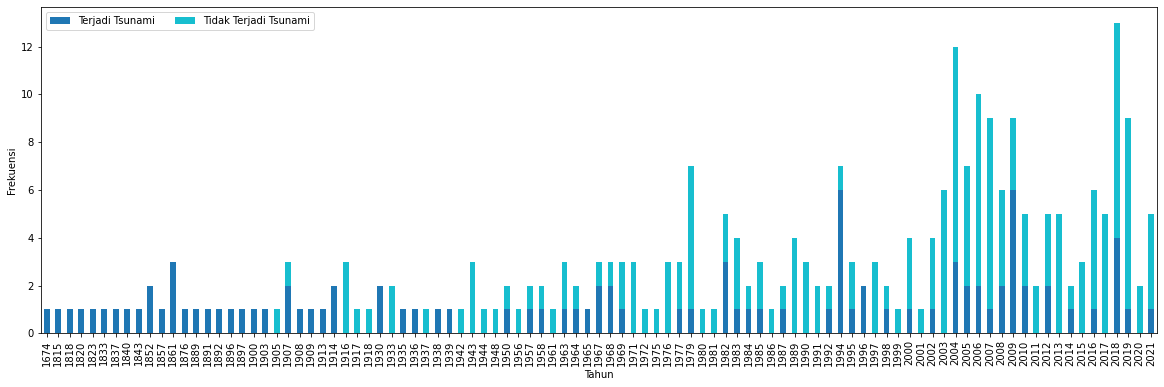

In [28]:
#barchart distribusi gempa bumi berdasarkan tahun
cross_tab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(20, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Tahun")
plt.ylabel("Frekuensi")
plt.show()

In [23]:
gempaThnTsu2000 = gempaThnTsu[gempaThnTsu['Year'] >=  2000]
gempaThnTsu2000

,Year,Tsu
141,2000,Terjadi Tsunami
142,2000,Tidak Terjadi Tsunami
143,2000,Tidak Terjadi Tsunami
144,2000,Tidak Terjadi Tsunami
145,2001,Tidak Terjadi Tsunami
...,...,...
266,2021,Tidak Terjadi Tsunami
267,2021,Tidak Terjadi Tsunami
268,2021,Terjadi Tsunami
269,2021,Tidak Terjadi Tsunami


In [24]:
cross_tab2000 = pd.crosstab(index=gempaThnTsu2000['Year'],
                        columns=gempaThnTsu2000['Tsu'])
cross_tab2000

Tsu,Terjadi Tsunami,Tidak Terjadi Tsunami
Year,,
2000,1,3
2001,0,1
2002,1,3
2003,0,6
2004,3,9
2005,2,5
2006,2,8
2007,1,8
2008,2,4


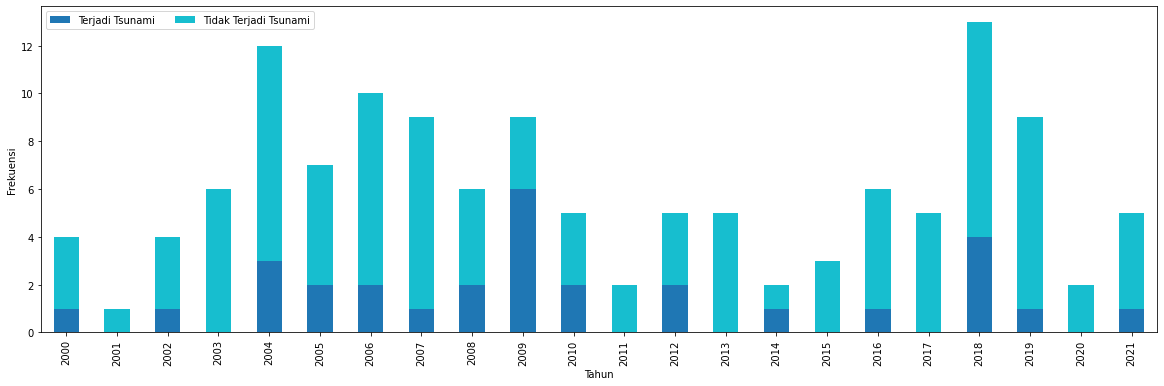

In [26]:
#barchart distribusi gempa bumi berdasarkan tahun >= 2000
cross_tab2000.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(20, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Tahun")
plt.ylabel("Frekuensi")
plt.show()

In [6]:
#magnitudo dan Tsunami
gempaMagTsu = gempa[["Mag", "Tsu"]]
gempaMagTsu

,Mag,Tsu
0,6.8,Terjadi Tsunami
1,7.0,Terjadi Tsunami
2,8.5,Terjadi Tsunami
3,7.5,Terjadi Tsunami
4,6.8,Terjadi Tsunami
...,...,...
266,6.2,Tidak Terjadi Tsunami
267,6.0,Tidak Terjadi Tsunami
268,5.8,Terjadi Tsunami
269,5.5,Tidak Terjadi Tsunami


In [7]:
#grouping berdasarkan Tsu dan dibuat rentang data untuk Mag
gempa3 = gempa.groupby(['Tsu', pd.cut(gempa['Mag'], bins=[4, 5, 6, 7, 8, 9, 10])]).size()
gempa3

Tsu                    Mag    
Terjadi Tsunami        (4, 5]      0
                       (5, 6]      6
                       (6, 7]     39
                       (7, 8]     39
                       (8, 9]     12
                       (9, 10]     1
Tidak Terjadi Tsunami  (4, 5]     13
                       (5, 6]     54
                       (6, 7]     65
                       (7, 8]     34
                       (8, 9]      8
                       (9, 10]     0
dtype: int64

<AxesSubplot:xlabel='Tsu,Mag'>

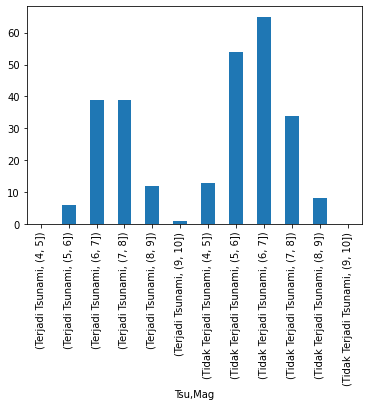

In [8]:
#barchart terjadinya Tsu
gempa3.plot(x='Tsu', kind='bar', stacked=True, title='')

In [9]:
#data yang hanya terjadi tsunami
gempa2 = gempa[gempa["Tsu"]=="Terjadi Tsunami"]
gempa2

,Year,Tsu,Location Name,Latitude,Longitude,Focal Depth (km),Mag
0,1674,Terjadi Tsunami,"INDONESIA: AMBON ISLAND, SERAM ISLAND",-3.750,127.750,40,6.8
1,1815,Terjadi Tsunami,INDONESIA: BALI,-8.000,115.000,150,7.0
2,1818,Terjadi Tsunami,INDONESIA: SUMBAWA ISLAND: BIMA,-7.000,117.000,600,8.5
3,1820,Terjadi Tsunami,INDONESIA: SULAWESI: MAKASAR,-7.000,119.000,80,7.5
4,1823,Terjadi Tsunami,INDONESIA: JAVA,-6.500,108.500,150,6.8
...,...,...,...,...,...,...,...
247,2018,Terjadi Tsunami,INDONESIA: LOMBOK ISLAND,-8.258,116.438,34,6.9
249,2018,Terjadi Tsunami,INDONESIA: LOMBOK ISLAND,-8.337,116.599,16,6.3
252,2018,Terjadi Tsunami,INDONESIA: SULAWESI,-0.256,119.846,20,7.5
263,2019,Terjadi Tsunami,INDONESIA: MOLUCCA ISLANDS: N,1.600,126.416,33,7.1


(array([ 0.,  5., 30., 46., 15.,  1.]),
 array([ 4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 6 artists>)

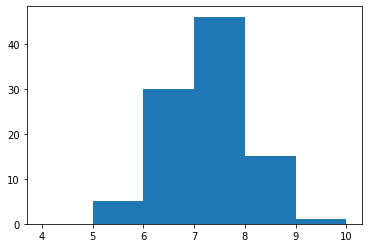

In [10]:
#histogram terjadinya tsunami berdasarkan Mag dan dibuat rentang Mag
plt.hist(gempa2["Mag"], [4, 5, 6, 7, 8, 9, 10], histtype='bar', stacked=True)

In [11]:
#dibuatkan rentang pada Mag
gempa['Mag'] = pd.cut(gempa['Mag'], bins=[4,5,6,7,8,9,10], include_lowest=True)
gempa

,Year,Tsu,Location Name,Latitude,Longitude,Focal Depth (km),Mag
0,1674,Terjadi Tsunami,"INDONESIA: AMBON ISLAND, SERAM ISLAND",-3.750,127.750,40,"(6.0, 7.0]"
1,1815,Terjadi Tsunami,INDONESIA: BALI,-8.000,115.000,150,"(6.0, 7.0]"
2,1818,Terjadi Tsunami,INDONESIA: SUMBAWA ISLAND: BIMA,-7.000,117.000,600,"(8.0, 9.0]"
3,1820,Terjadi Tsunami,INDONESIA: SULAWESI: MAKASAR,-7.000,119.000,80,"(7.0, 8.0]"
4,1823,Terjadi Tsunami,INDONESIA: JAVA,-6.500,108.500,150,"(6.0, 7.0]"
...,...,...,...,...,...,...,...
266,2021,Tidak Terjadi Tsunami,"INDONESIA: SULAWESI: MAMUJU, MAJENE",-2.976,118.901,18,"(6.0, 7.0]"
267,2021,Tidak Terjadi Tsunami,"INDONESIA: JAVA: LUMAJANG, MALANG",-8.562,112.519,82,"(5.0, 6.0]"
268,2021,Terjadi Tsunami,INDONESIA: MALUKU,-3.593,129.503,10,"(5.0, 6.0]"
269,2021,Tidak Terjadi Tsunami,INDONESIA: CENTRAL SULAWESI: TOJO UNA-UNA,-0.854,121.523,8,"(5.0, 6.0]"


In [12]:
#Cross Tab untuk Magnitudo
cross_tabMag = pd.crosstab(index=gempa['Mag'], columns=gempa['Tsu'])
cross_tabMag

Tsu,Terjadi Tsunami,Tidak Terjadi Tsunami
Mag,,
"(3.999, 5.0]",0,13
"(5.0, 6.0]",6,54
"(6.0, 7.0]",39,65
"(7.0, 8.0]",39,34
"(8.0, 9.0]",12,8
"(9.0, 10.0]",1,0


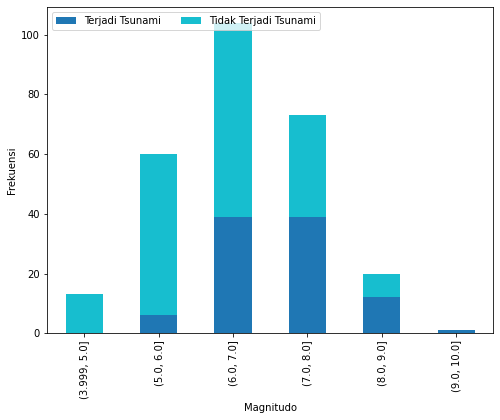

In [32]:
#Membuat diagram batang bertumpuk berdasarkan rentang Mag
cross_tabMag.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(8, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Magnitudo")
plt.ylabel("Frekuensi")
plt.show()

In [14]:
#membuat rentang untuk Focal Depth (km)
gempa['Focal Depth (km)'] = pd.cut(gempa['Focal Depth (km)'], bins=[0.001,50,100,150,200,250,300], include_lowest=True)
gempa

,Year,Tsu,Location Name,Latitude,Longitude,Focal Depth (km),Mag
0,1674,Terjadi Tsunami,"INDONESIA: AMBON ISLAND, SERAM ISLAND",-3.750,127.750,"(0.0, 50.0]","(6.0, 7.0]"
1,1815,Terjadi Tsunami,INDONESIA: BALI,-8.000,115.000,"(100.0, 150.0]","(6.0, 7.0]"
2,1818,Terjadi Tsunami,INDONESIA: SUMBAWA ISLAND: BIMA,-7.000,117.000,NaN,"(8.0, 9.0]"
3,1820,Terjadi Tsunami,INDONESIA: SULAWESI: MAKASAR,-7.000,119.000,"(50.0, 100.0]","(7.0, 8.0]"
4,1823,Terjadi Tsunami,INDONESIA: JAVA,-6.500,108.500,"(100.0, 150.0]","(6.0, 7.0]"
...,...,...,...,...,...,...,...
266,2021,Tidak Terjadi Tsunami,"INDONESIA: SULAWESI: MAMUJU, MAJENE",-2.976,118.901,"(0.0, 50.0]","(6.0, 7.0]"
267,2021,Tidak Terjadi Tsunami,"INDONESIA: JAVA: LUMAJANG, MALANG",-8.562,112.519,"(50.0, 100.0]","(5.0, 6.0]"
268,2021,Terjadi Tsunami,INDONESIA: MALUKU,-3.593,129.503,"(0.0, 50.0]","(5.0, 6.0]"
269,2021,Tidak Terjadi Tsunami,INDONESIA: CENTRAL SULAWESI: TOJO UNA-UNA,-0.854,121.523,"(0.0, 50.0]","(5.0, 6.0]"


In [15]:
#Cross Tab untuk Focal Depth (km)
cross_tabDepth = pd.crosstab(index=gempa['Focal Depth (km)'],
                        columns=gempa['Tsu'])
cross_tabDepth

Tsu,Terjadi Tsunami,Tidak Terjadi Tsunami
Focal Depth (km),,
"(0.0, 50.0]",68,128
"(50.0, 100.0]",18,34
"(100.0, 150.0]",8,3
"(150.0, 200.0]",1,4
"(200.0, 250.0]",0,1
"(250.0, 300.0]",0,1


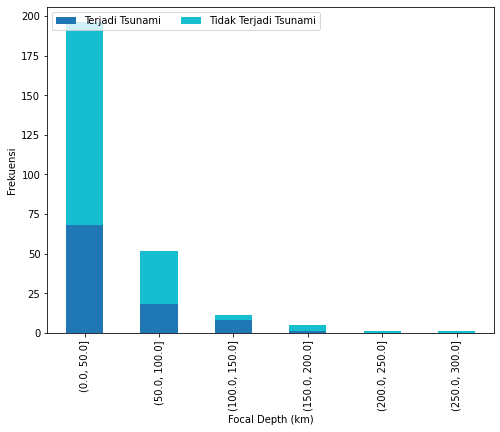

In [31]:
#Membuat diagram batang bertumpuk berdasarkan rentang Focal Depth (km)
cross_tabDepth.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(8, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Focal Depth (km)")
plt.ylabel("Frekuensi")
plt.show()